In [1]:
#!pip install -U pandas-profiling

In [2]:
!conda install -y pygraphviz pomegranate

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - pomegranate
    - pygraphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.10.8          |   py37h89c1867_1         145 KB  conda-forge
    conda-4.11.0               |   py37h89c1867_0        16.9 MB  conda-forge
    pomegranate-0.13.3         |   py37hc928c03_1         3.4 MB  conda-forge
    pygraphviz-1.7             |   py37ha333112_1         125 KB  conda-forge
    ------------------------------------------------------------
              

# Bank Loan Modelling

In [3]:
#importing libs
import numpy as np 
import pandas as pd 
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns #data visualization
import warnings
import pygraphviz
import math

from sklearn import preprocessing

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.tree import DecisionTreeClassifier
from pomegranate import *

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn import tree
from sklearn.tree import plot_tree 
from sklearn.tree import _tree

# Cross Validation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
df = pd.read_csv('../input/bank-loan-modelling/bank_loan_modelling.csv')

In [5]:
df.shape

(5000, 8)

In [6]:
df.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Personal Loan,Online
0,25,1,49,4,1.6,1,0,0
1,45,19,34,3,1.5,1,0,0
2,39,15,11,1,1.0,1,0,0
3,35,9,100,1,2.7,2,0,0
4,35,8,45,4,1.0,2,0,0


In [7]:
# Performing Exploratory Data Analysis using Panda Profiling
#profile = ProfileReport(df)
# putting Exploratory Data Analysis report to the notebook
#profile.to_file("Exploratory Data Analysis Report.html")
#profile.to_widgets()

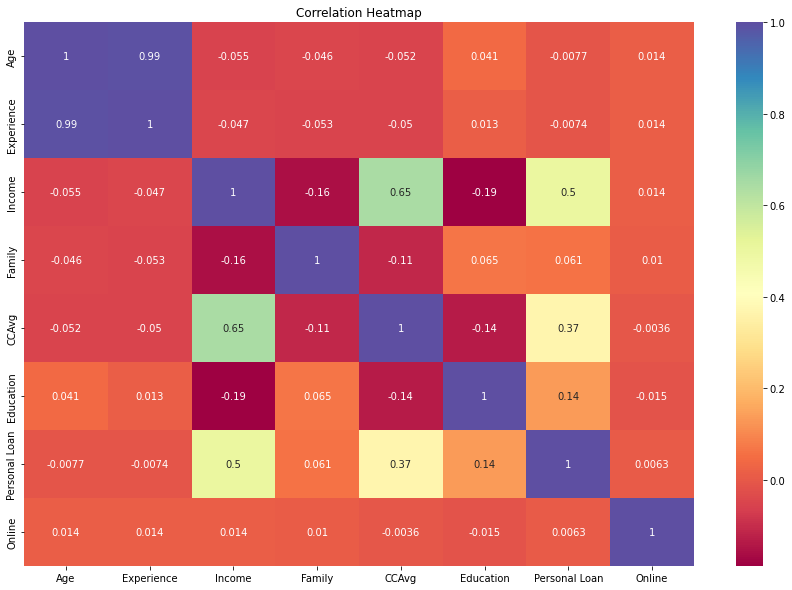

In [8]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="Spectral", annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [9]:
df.duplicated().sum()

81

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(4919, 8)

In [11]:
df = df[(df[['Experience']] >= 0).all(1)]
df.shape

(4867, 8)

In [12]:
df2 = df.copy()

In [13]:
min_income = df['Income'].min()
max_income = df['Income'].max()
print(min_income)
print(max_income)

8
224


In [14]:
bins_income_labels = [1,2,3,4,5,6,7,8,9,10]
bins_income = np.linspace(min_income,max_income,11)
print(bins_income)

[  8.   29.6  51.2  72.8  94.4 116.  137.6 159.2 180.8 202.4 224. ]


In [15]:
df2['income_bins'] = pd.cut(df2['Income'], bins=bins_income, labels=bins_income_labels,include_lowest=True)
df2.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Personal Loan,Online,income_bins
0,25,1,49,4,1.6,1,0,0,2
1,45,19,34,3,1.5,1,0,0,2
2,39,15,11,1,1.0,1,0,0,1
3,35,9,100,1,2.7,2,0,0,5
4,35,8,45,4,1.0,2,0,0,2


(array([ 780., 1114.,  843.,  852.,  368.,  301.,  263.,  197.,  140.,
           9.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

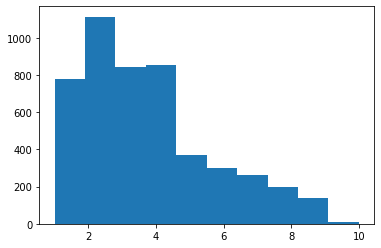

In [16]:
plt.hist(df2['income_bins'])

In [17]:
min_CCAvg = df['CCAvg'].min()
max_CCAvg = df['CCAvg'].max()
print(min_CCAvg)
print(max_CCAvg)

0.0
10.0


In [18]:
bins_CCAvg_labels = [1,2,3,4,5,6,7,8,9,10]
bins_CCAvg = np.linspace(min_CCAvg,max_CCAvg,11)
print(bins_CCAvg)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [19]:
df2['CCAvg_bins'] = pd.cut(df2['CCAvg'], bins=bins_CCAvg, labels=bins_CCAvg_labels, include_lowest=True)
df2.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Personal Loan,Online,income_bins,CCAvg_bins
0,25,1,49,4,1.6,1,0,0,2,2
1,45,19,34,3,1.5,1,0,0,2,2
2,39,15,11,1,1.0,1,0,0,1,1
3,35,9,100,1,2.7,2,0,0,5,3
4,35,8,45,4,1.0,2,0,0,2,1


(array([1861., 1298.,  868.,  297.,  202.,  105.,  119.,   78.,   35.,
           4.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

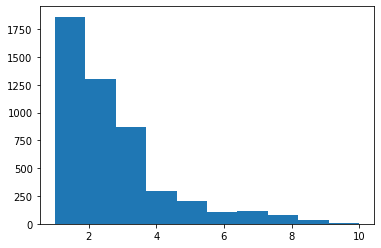

In [20]:
plt.hist(df2['CCAvg_bins'])

In [21]:
min_Age = df['Age'].min()
max_Age = df['Age'].max()
print(min_Age)
print(max_Age)

24
67


In [22]:
bins_age_labels = [1,2,3,4,5,6,7,8,9,10,11]
bins_age = np.arange(15, 71, 5)
print(bins_age)

[15 20 25 30 35 40 45 50 55 60 65 70]


In [23]:
df2['Age_bins'] = pd.cut(df2['Age'], bins=bins_age, labels=bins_age_labels, include_lowest=True)
df2.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Personal Loan,Online,income_bins,CCAvg_bins,Age_bins
0,25,1,49,4,1.6,1,0,0,2,2,2
1,45,19,34,3,1.5,1,0,0,2,2,6
2,39,15,11,1,1.0,1,0,0,1,1,5
3,35,9,100,1,2.7,2,0,0,5,3,4
4,35,8,45,4,1.0,2,0,0,2,1,4


In [24]:
#Bin limits for Experience
min_Experience = df['Experience'].min()
max_Experience = df['Experience'].max()
print(min_Experience)
print(max_Experience)

0
43


In [25]:
#Finding bins for Experience
bins_exp_labels = [1,2,3,4,5,6,7,8,9]
bins_exp = np.arange(0, 50, 5)
print(bins_exp)

[ 0  5 10 15 20 25 30 35 40 45]


In [26]:
#Binning Experience
df2['Exp_bins'] = pd.cut(df2['Experience'], bins=bins_exp, labels=bins_exp_labels, include_lowest=True)
df2.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Personal Loan,Online,income_bins,CCAvg_bins,Age_bins,Exp_bins
0,25,1,49,4,1.6,1,0,0,2,2,2,1
1,45,19,34,3,1.5,1,0,0,2,2,6,4
2,39,15,11,1,1.0,1,0,0,1,1,5,3
3,35,9,100,1,2.7,2,0,0,5,3,4,2
4,35,8,45,4,1.0,2,0,0,2,1,4,2


In [27]:
#Dropping without numerical variables
data_BBN = df2.drop(['Age', 'Experience', 'Income','CCAvg'],axis=1)
data_BBN.head()

,Family,Education,Personal Loan,Online,income_bins,CCAvg_bins,Age_bins,Exp_bins
0,4,1,0,0,2,2,2,1
1,3,1,0,0,2,2,6,4
2,1,1,0,0,1,1,5,3
3,1,2,0,0,5,3,4,2
4,4,2,0,0,2,1,4,2


In [28]:
#Finding discrete probability for independent variable
def discreteProb(a, data):
  Probs=data.groupby(a).size()/len(data)
  C = pd.DataFrame(Probs)
  C.columns=['Probability']
  return C 

#finding conditional probability
def condProbTable(a , given , data):
    final = []
    if len(given)!=0:
        Given=list(given)
        Given.append(a)
        Probs=data.groupby(Given).size()/data.groupby(given).size()
        A = pd.DataFrame(Probs)
        Indexes = A.index
        
        C=pd.DataFrame()
        FirstColName='('
        for i in range(0,len( Indexes.names )-1):
            FirstColName=FirstColName+Indexes.names[i]+' '
            if(i==len(Indexes.names)-2):
                FirstColName=FirstColName+')'
            else:
                FirstColName=FirstColName+', '
        C[FirstColName]=[Indexes[i][0:len(given)] for i in range(0,len(Indexes))]
        D=C.copy()
        C=C.drop_duplicates().reset_index(drop =True)
        aValues= [Indexes[i][len(given)] for i in range(0,len(Indexes))]
        for i in list(set(aValues)):
            C[a+' = '+str(i)] = 0.
        for i in range(0,len(C)):
            for j in D[D.iloc[:,0]==C.iloc[:,0][i]].index.values:
                x=list(C.iloc[i,0])
                x.append(aValues[j])
                #x.append(A.loc[x])
                x=tuple(x)
                bc = A.loc[x,0]
                if math.isnan(bc):
                  bc = 0
                new = x + (bc,) 
                final.append(list(new))
                #print(list(new))
                
                C[a+' = '+str(aValues[j])][i]=A.loc[x]
    else:
        print("Given is none")   
    return final

In [29]:
#discrete probability of age
age_prob = discreteProb('Age_bins', data=data_BBN)
print(age_prob)

          Probability
Age_bins             
1            0.000000
2            0.009246
3            0.106226
4            0.131087
5            0.118143
6            0.132936
7            0.124101
8            0.130881
9            0.135813
10           0.104582
11           0.006986


In [30]:
#discrete probability of family
family_prob = discreteProb('Family', data=data_BBN)
print(family_prob)

        Probability
Family             
1          0.297514
2          0.257859
3          0.201356
4          0.243271


In [31]:
# Age node has no parents
age = Node(DiscreteDistribution({
    1	: 0.000000,
    2	: 0.009246,
    3	: 0.106226,
    4	: 0.131087,
    5	: 0.118143,
    6	: 0.132936,
    7	: 0.124101,
    8	: 0.130881,
    9	: 0.135813,
    10	: 0.104582,
    11	: 0.006986
}), name="Age")

In [32]:
# Family node has no parents
family = Node(DiscreteDistribution({
    1  :  0.297514,
    2  :  0.257859,
    3  :  0.201356,
    4  :  0.243271
}), name="Family")

In [33]:
# Education node is conditional on Age
education = Node(ConditionalProbabilityTable(condProbTable('Education', given= ['Age_bins'], data=data_BBN), [age.distribution]), name="Education")

# Experince node is conditional on Age
experince = Node(ConditionalProbabilityTable(condProbTable('Exp_bins', given= ['Age_bins'], data=data_BBN), [age.distribution]), name="Experince")

# Online node is conditional on Education
online = Node(ConditionalProbabilityTable(condProbTable('Online', given= ['Education'], data=data_BBN), [education.distribution]), name="Online")

# Income node is conditional on Education and Experince
income = Node(ConditionalProbabilityTable(condProbTable('income_bins', given= ['Exp_bins', 'Education'], data=data_BBN), [experince.distribution, education.distribution]), name="Income")

# CCAvg node is conditional on Income, Online and Family
ccavg = Node(ConditionalProbabilityTable(condProbTable('CCAvg_bins', given= ['income_bins', 'Online' , 'Family'], data=data_BBN), [income.distribution, online.distribution, family.distribution]), name="CCAvg")

# Personal Loan node is conditional on Income and CCAvg
personal_loan = Node(ConditionalProbabilityTable(condProbTable('Personal Loan', given= ['CCAvg_bins', 'income_bins'], data=data_BBN), [ccavg.distribution, income.distribution]), name="Personal Loan")


In [34]:
# Create a Bayesian Network and add states
BBNmodel = BayesianNetwork('Loan Prediction')
BBNmodel.add_states(age, family, education, experince, online, income, ccavg, personal_loan)

In [35]:
# Add edges connecting nodes
BBNmodel.add_edge(age, education)
BBNmodel.add_edge(education, online)
BBNmodel.add_edge(age, experince)
BBNmodel.add_edge(experince, income)
BBNmodel.add_edge(education, income)
BBNmodel.add_edge(online, ccavg)
BBNmodel.add_edge(income, ccavg)
BBNmodel.add_edge(family, ccavg)
BBNmodel.add_edge(ccavg, personal_loan)
BBNmodel.add_edge(income, personal_loan)

In [36]:
# Finalize model
BBNmodel.bake()

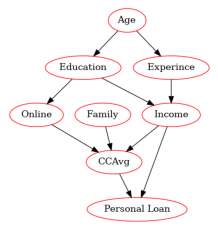

In [37]:
# Ploting model
BBNmodel.plot()

In [38]:
# Print predictions for each node
def printPrediction(predictions):
  for node, prediction in zip(BBNmodel.states, predictions):
      if isinstance(prediction, str):
          print(f"{node.name}: {prediction}")
      else:
          print(f"{node.name}")
          for value, probability in prediction.parameters[0].items():
              print(f"    {value}: {probability:.4f}")

In [39]:
# Calculate probability that a customer with 4 people in their family, who uses online internet banking facilities, and has a graduate degree took a personal loan
predictions = BBNmodel.predict_proba({
    "Online" : "1",
    "Education": "2",
    "Family" : "4"
})

# Print predictions
printPrediction(predictions)

Age
    1: 0.0000
    2: 0.0092
    3: 0.1062
    4: 0.1311
    5: 0.1181
    6: 0.1329
    7: 0.1241
    8: 0.1309
    9: 0.1358
    10: 0.1046
    11: 0.0070
Family: 4
Education: 2
Experince
    1: 0.1237
    2: 0.1253
    3: 0.1177
    4: 0.1360
    5: 0.1323
    6: 0.1296
    7: 0.1303
    8: 0.0943
    9: 0.0107
Online: 1
Income
    1: 0.0313
    2: 0.0625
    3: 0.0625
    4: 0.0938
    5: 0.1094
    6: 0.1250
    7: 0.1406
    8: 0.1406
    9: 0.1562
    10: 0.0781
CCAvg
    1: 0.1406
    2: 0.1406
    3: 0.1406
    4: 0.1250
    5: 0.1094
    6: 0.0938
    7: 0.0938
    8: 0.0625
    9: 0.0625
    10: 0.0313
Personal Loan
    0: 0.6882
    1: 0.3118


**Probability for the data with the following properties:**

Age	= 41-45  
Family = 2	
Education = 3	
Experience = 16-25	
Personal Loan = 1



In [40]:
# Calculate probability for a given observation (age, family, education, experince, online, income, ccavg, personal_loan)
probability = BBNmodel.probability([[5, 2, 3, 4, None, None, None, 1]])

# Print predictions
print(probability)

0.000733260911276661


In [41]:
# Calculate probability that a customer with 4 people in their family, who uses online internet banking facilities, and has a graduate degree took a personal loan
predictions = BBNmodel.predict_proba({
    "age" : "5",
    "Education": "3",
    "Family" : "2",
    "Experince" : "4",
    "Personal Loan" : "1"
})

printPrediction(predictions)

Age
    1: 0.0000
    2: 0.0092
    3: 0.1062
    4: 0.1311
    5: 0.1181
    6: 0.1329
    7: 0.1241
    8: 0.1309
    9: 0.1358
    10: 0.1046
    11: 0.0070
Family: 2
Education: 3
Experince: 4
Online
    0: 0.5000
    1: 0.5000
Income
    1: 0.1000
    2: 0.1000
    3: 0.1000
    4: 0.1000
    5: 0.1000
    6: 0.1000
    7: 0.1000
    8: 0.1000
    9: 0.1000
    10: 0.1000
CCAvg
    1: 0.1000
    2: 0.1000
    3: 0.1000
    4: 0.1000
    5: 0.1000
    6: 0.1000
    7: 0.1000
    8: 0.1000
    9: 0.1000
    10: 0.1000
Personal Loan: 1


# Decision Tree Classification Model

In [42]:
# defining the features and target
X = df.drop(['Personal Loan'],axis=1)
y = df[['Personal Loan']]
X.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Online
0,25,1,49,4,1.6,1,0
1,45,19,34,3,1.5,1,0
2,39,15,11,1,1.0,1,0
3,35,9,100,1,2.7,2,0
4,35,8,45,4,1.0,2,0


In [43]:
#Train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (3893, 7)
The shape of X_test is        (974, 7)
The shape of y_train is       (3893, 1)
The shape of y_test is        (974, 1)


In [44]:
#Create Decision Tree Classification Model
dt_model = DecisionTreeClassifier(criterion = "entropy", random_state = 42)
dt_model.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
predict_dt = dt_model.predict(X_test)

dt_model.tree_

In [45]:
#Getting the complete Classification Report for Decision Tree Classification Model
print(classification_report(y_test, predict_dt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       881
           1       0.93      0.88      0.91        93

    accuracy                           0.98       974
   macro avg       0.96      0.94      0.95       974
weighted avg       0.98      0.98      0.98       974



In [46]:
def get_readable_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [47]:
rules = get_readable_rules(dt_model, list(X_train.columns), ['0','1'])
for r in rules:
    print(r)

if (Income <= 98.5) and (CCAvg <= 2.95) then class: 0 (proba: 100.0%) | based on 2,751 samples
if (Income > 98.5) and (Education <= 1.5) and (Family <= 2.5) and (Income > 104.5) then class: 0 (proba: 100.0%) | based on 486 samples
if (Income > 98.5) and (Education > 1.5) and (Income > 116.5) then class: 1 (proba: 100.0%) | based on 250 samples
if (Income > 98.5) and (Education <= 1.5) and (Family > 2.5) and (Income > 113.5) then class: 1 (proba: 100.0%) | based on 60 samples
if (Income > 98.5) and (Education > 1.5) and (Income <= 116.5) and (CCAvg <= 2.725) and (Income <= 106.5) then class: 0 (proba: 100.0%) | based on 38 samples
if (Income <= 98.5) and (CCAvg > 2.95) and (Income <= 82.5) and (Age > 30.5) and (Experience > 8.5) and (Income <= 74.5) then class: 0 (proba: 100.0%) | based on 37 samples
if (Income > 98.5) and (Education <= 1.5) and (Family <= 2.5) and (Income <= 104.5) and (CCAvg <= 3.317) then class: 0 (proba: 100.0%) | based on 20 samples
if (Income <= 98.5) and (CCAvg >

In [48]:
def get_prolog_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"{name} =< {np.round(threshold, 3)}"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"{name} > {np.round(threshold, 3)}"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = ":- "
        
        for p in path[:-1]:
            if rule != ":- ":
                rule += ", "
            rule += str(p)
        rule += "."
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule = "class(" + class_names[l] + ", Age, Experience, Income, Family, CCAvg, Education, Online) " + rule
        rules += [rule]
        
    return rules

In [49]:
rules = get_prolog_rules(dt_model, list(X_train.columns), ['0','1'])
for r in rules:
    print(r)

class(0, Age, Experience, Income, Family, CCAvg, Education, Online) :- Income =< 98.5, CCAvg =< 2.95.
class(0, Age, Experience, Income, Family, CCAvg, Education, Online) :- Income > 98.5, Education =< 1.5, Family =< 2.5, Income > 104.5.
class(1, Age, Experience, Income, Family, CCAvg, Education, Online) :- Income > 98.5, Education > 1.5, Income > 116.5.
class(1, Age, Experience, Income, Family, CCAvg, Education, Online) :- Income > 98.5, Education =< 1.5, Family > 2.5, Income > 113.5.
class(0, Age, Experience, Income, Family, CCAvg, Education, Online) :- Income > 98.5, Education > 1.5, Income =< 116.5, CCAvg =< 2.725, Income =< 106.5.
class(0, Age, Experience, Income, Family, CCAvg, Education, Online) :- Income =< 98.5, CCAvg > 2.95, Income =< 82.5, Age > 30.5, Experience > 8.5, Income =< 74.5.
class(0, Age, Experience, Income, Family, CCAvg, Education, Online) :- Income > 98.5, Education =< 1.5, Family =< 2.5, Income =< 104.5, CCAvg =< 3.317.
class(0, Age, Experience, Income, Family, 